<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов Бета - Банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»).

**Признаки**

- RowNumber — индекс строки в данных
- CustomerId — уникальный идентификатор клиента
- Surname — фамилия
- CreditScore — кредитный рейтинг
- Geography — страна проживания
- Gender — пол
- Age — возраст
- Tenure — сколько лет человек является клиентом банка
- Balance — баланс на счёте
- NumOfProducts — количество продуктов банка, используемых клиентом
- HasCrCard — наличие кредитной карты
- IsActiveMember — активность клиента
- EstimatedSalary — предполагаемая зарплата

**Целевой признак**
- Exited — факт ухода клиента

**Наша цель:**

1.	Загрузить и подготовить данные. Пояснить порядок действий.
2.	Исследовать баланс классов, обучите модель без учёта дисбаланса. Кратко описать выводы.
3.	Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найти лучшую. Кратко описать выводы.
4.	Провести финальное тестирование.

**Наш план:**

1. Загрузим данные и подготовим их
    - Проверить на дубликаты (явные и неявные). Если нужно, обработать или удалить их.
    - Обработать пропуски в данных, если таковы имеются.
    - Подготовить данные к машинному обучению
2.	Исследовуем баланс классов, обучим модель без учёта дисбаланса. Кратко опишем выводы.
3.	Улучшим качество модели, учитывая дисбаланс классов. Обучим разные модели и найдём лучшую. Кратко опишем выводы.
4.	Проведём финальное тестирование.

In [1]:
# ячейка для импорта библиотек
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, roc_curve, roc_auc_score, recall_score
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt

## Подготовка данных

In [2]:
# знакомимся с данными
clients = pd.read_csv(r'https://code.s3.yandex.net/datasets/Churn.csv')
clients.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


На вскидку - пропусков, скорее всего, нет. Но, это мы ещё проверим. Есть как числовые данные, так и строки. Также не помешает проверить данные на дубликаты. 

In [3]:
# проверяем на пропуски
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Все данные полные, кроме пропусков в столце Tenure (909). Столбцы Surname, Geography, Gender - ожидаемо строки. Столбец CustomerId нужен только для проверки уникальности клиента при равенстве остальных строк (для обучения почти бесполезен).

In [4]:
# проверка на явные дубликаты
clients.duplicated().sum()

0

Явных дубликатов нет. Неявные дубликаты могут возникнуть из-за столбцов Surname и Geography. На всякий случай надо проверить.

In [5]:
# проверяем  на  неявные дубликаты столбцы Surname и Geography
print(clients.sort_values(by='Geography').Geography.unique())
clients.sort_values(by='Surname').Surname.unique()

['France' 'Germany' 'Spain']


array(['Abazu', 'Abbie', 'Abbott', ..., 'Zuev', 'Zuyev', 'Zuyeva'],
      dtype=object)

В странах нет точно неявных дубликатов. В фамилиях только если есть ошибки в написании - а так все начинаются с заглавной буквы и написаны латиницей. Список слишком большой - все названия не выводит. будем считать, что тут скрытых дубликатов нет.

In [6]:
# проверяем уникальные данные в столце с пропусками (Tenure)
clients.sort_values(by='Tenure').Tenure.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

Данные разбиты по годам - нецелые числа возникли только из-за пропусков. Можно было бы предположить, что это данные недавних клиентов, но это нам не подтвердить никак. В таком случае постоим график распределения и посмотрим наиболее возможноные значения, чтобы при заполнении не исказить значения столбца.

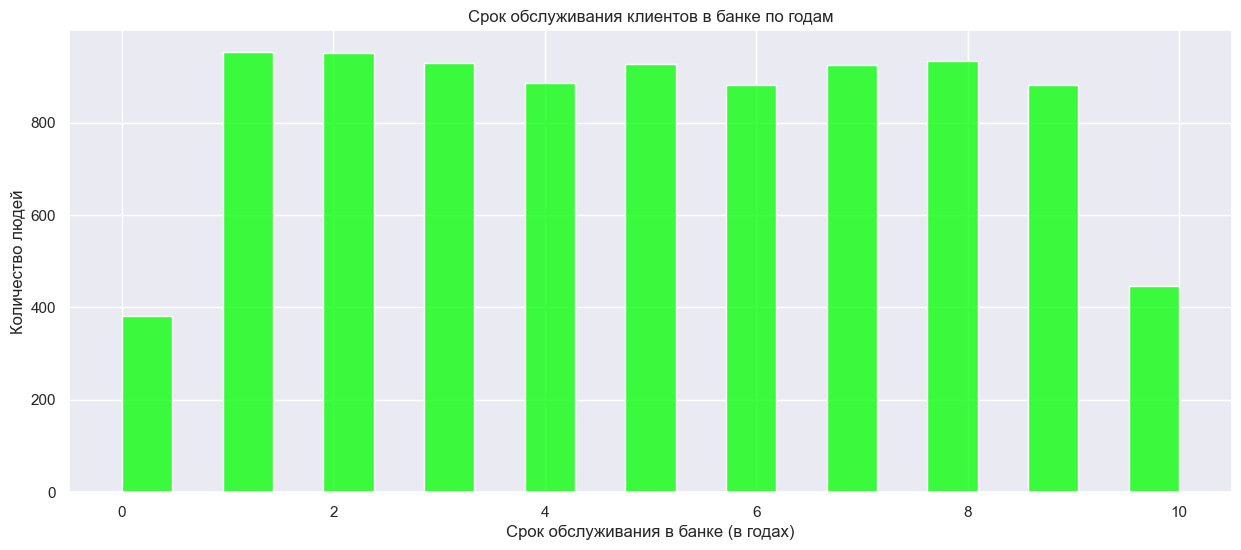

In [7]:
# строим график распределения столбца Tenure (срок обслуживания в банке)
sns.set(rc={'figure.figsize': (15, 6)})
ax = sns.histplot(x=clients.Tenure, color='lime')
ax.set(xlabel='Срок обслуживания в банке (в годах)', ylabel='Количество людей', \
       title='Срок обслуживания клиентов в банке по годам');

Значения распределены равномерно. Притом, сильно отличаются лишь 0 и 10 лет. Для того, чтобы не искажать данные заполним значение медианой.

In [8]:
# заполняем пропуски в столбце Tenure медианой
clients.Tenure.fillna(clients.Tenure.median(), inplace=True)

# проверка на пропуски
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Как представляется номер строки, уникальный идентификационных номер клиента и фамилия не очень важны для дальнейшего анализа данных, а вот столбцы со страной и полом надо преобразовать в числа. Сделаем это по технологии OHE (One-Hot-Encoding).

In [9]:
# преобразуем столбцы Geography и Gender по технологии OHE
clients_ohe = pd.get_dummies(data=clients, columns=['Geography', 'Gender'], drop_first=True, dtype='uint32')

clients_ohe = clients_ohe.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# смотрим на результат преобразований
clients_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint32 
 10  Geography_Spain    10000 non-null  uint32 
 11  Gender_Male        10000 non-null  uint32 
dtypes: float64(3), int64(6), uint32(3)
memory usage: 820.4 KB


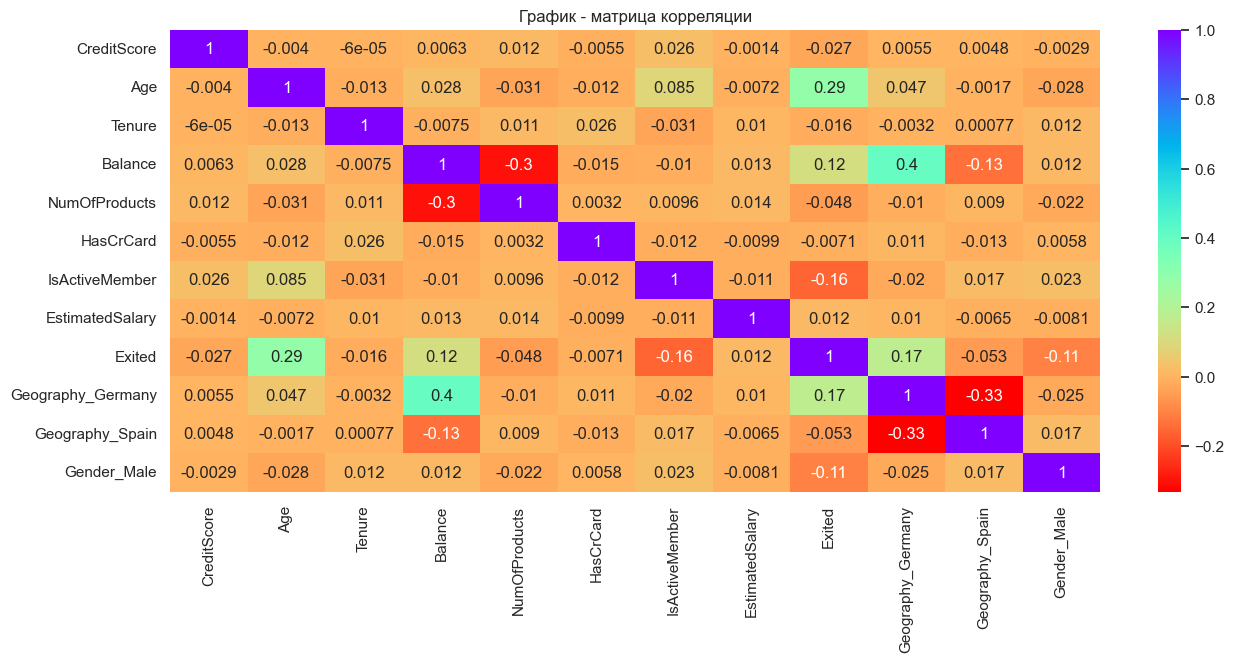

In [10]:
# проверим как наши данные соотносятся с фактом выхода - постоим график корреляции
ax = sns.heatmap(data=clients_ohe.corr(), annot=True, cmap='rainbow_r')
ax.set(title='График - матрица корреляции');

Сверхсильно влияющих друг на друга данных у нас нет. Но, правда, тоже самое касается и целевой переменной.

Следующее, что надо сделать в рамках подготовки данных - отмасшабировать все изначальные количественные переменные. Нужно это затем, чтобы не было например, сверхсильного влияния зарплаты на факт ухода, а возраст вообще влияния не оказывал. Нам важны все данные, а не их часть.

In [11]:
pd.options.mode.chained_assignment = None

# отделим целовой признак от всех остальных
features_clients = clients_ohe.drop('Exited', axis=1)
target_clients = clients_ohe.Exited
features_train_clients, features_test_clients, target_train_clients, target_test_clients \
= train_test_split(features_clients, target_clients, test_size=0.2, random_state=22)

# делим тренировочные данные на обучающие и валидационные
features_train_clients, features_valid_clients, target_train_clients, target_valid_clients \
= train_test_split(features_train_clients, target_train_clients, test_size=0.25, random_state=22)

# проводим стандартизацию количественных переменных
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(features_train_clients[numeric])
features_train_clients[numeric] = scaler.transform(features_train_clients[numeric])
features_test_clients[numeric] = scaler.transform(features_test_clients[numeric])
features_valid_clients[numeric] = scaler.transform(features_valid_clients[numeric])

# смотрим на результат
print(features_train_clients.shape, features_valid_clients.shape, features_test_clients.shape, sep='\n')
print(target_train_clients.shape, target_valid_clients.shape, target_test_clients.shape, sep='\n')
features_train_clients.head()

(6000, 11)
(2000, 11)
(2000, 11)
(6000,)
(2000,)
(2000,)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
5079,-2.297469,-0.186789,0.007897,-1.231362,0.782433,1,1,0.370785,0,0,1
9887,0.339634,-1.444956,1.092997,1.061898,-0.910534,1,1,-1.343116,0,1,1
4157,2.042977,2.232762,0.007897,-1.231362,0.782433,1,1,1.388453,0,1,1
291,0.986083,0.200339,0.007897,0.278300,0.782433,1,0,1.642761,0,1,0
5511,0.165195,-0.670700,-1.800603,0.427244,-0.910534,1,0,-1.377176,1,0,1


Теперь данные готовы к машинному обучению. Можно обучать различные модели и смотреть, что получается. Но сначала нужно иссдедовать есть ли дисбаланс классов? Если он имеет место быть - надо придумать стратегию борьбы с ним.

## Исследование задачи

In [12]:
# сколько у нас представителей разных классов?
print(features_train_clients[target_train_clients == 1].Age.count())
print(features_train_clients[target_train_clients == 0].Age.count())

1230
4770


Итак: на тестовых данных у вас почти в 4 раза больше примеров отрицательного класса, в отличие от положительного.
С этим есть 3 способа борьбы:
1. Взять разные веса для каждого класса. Это для скорости можно проверить на логистической регресии.
2. Увеличить количество положительных примеров (метод upsampling)
3. Уменьшить количество отрицательных примеров (метод downsampling) 

Сначала проверим первый способ, Потом проверим второй.

In [13]:
# логистическая модель без учёта дисбаланса
log_disbalance_model = LogisticRegression(solver='liblinear', random_state=22)
log_disbalance_model.fit(features_train_clients, target_train_clients)
disbalance_predicted = log_disbalance_model.predict(features_valid_clients)
disbalance_probabilities = log_disbalance_model.predict_proba(features_valid_clients)
print('F1 мера равна', f1_score(target_valid_clients, disbalance_predicted))
print("Площадь под ROC-кривой равна", roc_auc_score(target_valid_clients, disbalance_probabilities[:, 1]))

F1 мера равна 0.31616341030195383
Площадь под ROC-кривой равна 0.7605205495812911


Учитывая, что метрика F1_score может быть от 0 до 1 то, что наша метрика показала примерно 0.319 это пока что не очень хороший показатель. Но, при этом, Площадь под ROC-кривой больше, чем 0.5 и это показывает, что даже такая модель уже лучше совершенно случайной.

Теперь непосредственно будем бороться с дисбалансом классов.

In [14]:
%%time

# "решающее дерево" без учёта дисбаланса классов
best_disbalance_tree = None
best_disbalance_f1_score_tree = 0
best_disbalance_roc_auc_score_tree = 0.0
disbalance_depth_tree = 1
disbalance_leaf_split = 2
disbalance_impurity_tree = 0.0

for depth in range(1, 21):
    for split in range(2, 31):
        for impurity_down in np.arange(0.0, 0.06, 0.01):
            model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=depth, min_samples_split=split,\
                                                min_impurity_decrease=impurity_down, random_state=22)
            model_tree.fit(features_train_clients, target_train_clients)
            predictions_tree = model_tree.predict(features_valid_clients)
            probabilities_tree = model_tree.predict_proba(features_valid_clients)
            f1_score_tree = f1_score(target_valid_clients, predictions_tree)
            roc_auc = roc_auc_score(target_valid_clients, probabilities_tree[:, 1])
            if f1_score_tree > best_disbalance_f1_score_tree:
                best_disbalance_tree = model_tree
                best_disbalance_f1_score_tree = f1_score_tree
                best_disbalance_roc_auc_score_tree = roc_auc
                disbalance_depth_tree, disbalance_leaf_split, disbalance_impurity_tree = depth, split, impurity_down
                
print('F1 мера решающего дисбалансного дерева равна:', best_disbalance_f1_score_tree)
print("Площадь под ROC-кривой дисбалансного дерева равна", best_disbalance_roc_auc_score_tree)
print('Параметры решающего дисбалансного дерева:', f'Глубина дерева: {disbalance_depth_tree}',\
      f'Минимальное число выборок для разделения внутреннего узла: {disbalance_leaf_split}',\
      f'Минимальное снижение примеси: {disbalance_impurity_tree}', sep='\n')

F1 мера решающего дисбалансного дерева равна: 0.6134094151212555
Площадь под ROC-кривой дисбалансного дерева равна 0.8152681375453812
Параметры решающего дисбалансного дерева:
Глубина дерева: 9
Минимальное число выборок для разделения внутреннего узла: 5
Минимальное снижение примеси: 0.0
CPU times: total: 1min 57s
Wall time: 1min 57s


Интересный момент - в случае решающего дерева без учёта дисбаланса уже достигнута необходимая F1 мера, площадь под ROC - кривой значительно больше, чем в случае логистической регрессии.

In [15]:
%%time

# учим модель случайного леса без учёта дисбаланса классов
best_disbalance_forest = None
depth_tree_disbalance_forest = 1
best_f1_score_disbalance_forest = 0
best_roc_auc_score_disbalance_forest = 0.0
n_trees_disbalance = 30

for est in range(20, 151, 10):
    for depth in range(1, 21):
        model_forest = RandomForestClassifier(n_estimators=est, criterion='entropy', max_depth=depth, \
                                              random_state=22)
        model_forest.fit(features_train_clients, target_train_clients)
        predictions_forest = model_forest.predict(features_valid_clients)
        probabilities_forest = model_forest.predict_proba(features_valid_clients)
        f1_score_forest = f1_score(target_valid_clients, predictions_forest)
        roc_auc_forest = roc_auc_score(target_valid_clients, probabilities_forest[:, 1])
        if f1_score_forest > best_f1_score_disbalance_forest:
            best_disbalance_forest = model_forest
            best_f1_score_disbalance_forest = f1_score_forest
            best_roc_auc_score_disbalance_forest = roc_auc_forest
            depth_tree_disbalance_forest = depth
            n_trees_disbalance = est
                    
print('F1 мера случайного леса равна:', best_f1_score_disbalance_forest)
print("Площадь под ROC-кривой равна", best_roc_auc_score_disbalance_forest)
print('Параметры случайного леса:', f'Глубина дерева: {depth_tree_disbalance_forest}',\
      f'Количество деревьев: {n_trees_disbalance}' , sep='\n')

F1 мера случайного леса равна: 0.6137724550898204
Площадь под ROC-кривой равна 0.8647529625053018
Параметры случайного леса:
Глубина дерева: 19
Количество деревьев: 90
CPU times: total: 6min 41s
Wall time: 6min 45s


Интересный момент: F1 мера практически идеинтична рашающему дереву выше, а вот площадь под ROC-кривой у Случайного леса значительно больше. Да и гиперпараметры интересны: большая глубина дерева при среднем количестве деревьев.

## Борьба с дисбалансом

In [16]:
# простейший способ борьбы - установка стоимости класса
# логистическая модель
log_model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=22)
log_model.fit(features_train_clients, target_train_clients)
balance_predicted = log_model.predict(features_valid_clients)
balance_probabilities = log_model.predict_proba(features_valid_clients)
print('F1 мера равна', f1_score(target_valid_clients, balance_predicted))
print("Площадь под ROC-кривой равна", roc_auc_score(target_valid_clients, balance_probabilities[:, 1]))

F1 мера равна 0.4982456140350877
Площадь под ROC-кривой равна 0.7632552876451395


Модель с использованием классов весов гораздо лучше, чем без неё, но этого всё ещё сильно недостаточно для поставленной задачи.

Как с этим справятся решающее дерево и случайный лес? Проверим это.

In [17]:
%%time

# "решающее" дерево с установкой веса разных классов
best_tree = None
best_f1_score_tree = 0
best_roc_auc_score_tree = 0.0
depth_tree = 1
leaf_split = 2
impurity_tree = 0.0

for depth in range(1, 21):
    for split in range(2, 31):
        for impurity_down in np.arange(0.0, 0.06, 0.01):
            model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=depth, min_samples_split=split,\
                                                min_impurity_decrease=impurity_down, class_weight={0:1, 1:4},\
                                               random_state=22)
            model_tree.fit(features_train_clients, target_train_clients)
            predictions_tree = model_tree.predict(features_valid_clients)
            probabilities_tree = model_tree.predict_proba(features_valid_clients)
            f1_score_tree = f1_score(target_valid_clients, predictions_tree)
            roc_auc = roc_auc_score(target_valid_clients, probabilities_tree[:, 1])
            if f1_score_tree > best_f1_score_tree:
                best_tree = model_tree
                best_f1_score_tree = f1_score_tree
                best_roc_auc_score_tree = roc_auc
                depth_tree, leaf_split, impurity_tree = depth, split, impurity_down
                
print('F1 мера решающего дерева равна:', best_f1_score_tree)
print("Площадь под ROC-кривой равна", best_roc_auc_score_tree)
print('Параметры решающего дерева:', f'Глубина дерева: {depth_tree}',\
      f'Минимальное число выборок для разделения внутреннего узла: {leaf_split}',\
      f'Минимальное снижение примеси: {impurity_tree}', sep='\n')

F1 мера решающего дерева равна: 0.5859872611464968
Площадь под ROC-кривой равна 0.8559615299221075
Параметры решающего дерева:
Глубина дерева: 6
Минимальное число выборок для разделения внутреннего узла: 21
Минимальное снижение примеси: 0.0
CPU times: total: 2min 28s
Wall time: 2min 31s


Точность дерева при установке класса значительно выше, чем у логистической регрессии, но всё ещё недостаточна для решения задачи. Поиск решения недолгий. Теперь надо проверить "случайный" лес.

А вот в случае с другим решающим деревом с дисбалансом классов - тут глубина дерева ниже (6 против 9), F1 мера немного ниже, но площадь под ROC - кривой выше.

In [18]:
%%time

# определяем подходящую глубину дерева и количество деревьев в модели "случайного леса"
best_forest = None
depth_tree_forest = 1
best_f1_score_forest = 0
best_roc_auc_score_forest = 0.0
n_trees = 30

for est in range(20, 151, 10):
    for depth in range(1, 21):
        model_forest = RandomForestClassifier(n_estimators=est, criterion='entropy', max_depth=depth, \
                                              class_weight={0:1, 1:4}, random_state=22)
        model_forest.fit(features_train_clients, target_train_clients)
        predictions_forest = model_forest.predict(features_valid_clients)
        probabilities_forest = model_forest.predict_proba(features_valid_clients)
        f1_score_forest = f1_score(target_valid_clients, predictions_forest)
        roc_auc_forest = roc_auc_score(target_valid_clients, probabilities_forest[:, 1])
        if f1_score_forest > best_f1_score_forest:
            best_forest = model_forest
            best_f1_score_forest = f1_score_forest
            best_roc_auc_score_forest = roc_auc_forest
            depth_tree_forest = depth
            n_trees = est
                    
print('F1 мера случайного леса равна:', best_f1_score_forest)
print("Площадь под ROC-кривой равна", best_roc_auc_score_forest)
print('Параметры случайного леса:', f'Глубина дерева: {depth_tree_forest}',\
      f'Количество деревьев: {n_trees}' , sep='\n')

F1 мера случайного леса равна: 0.6558197747183979
Площадь под ROC-кривой равна 0.8676461806305211
Параметры случайного леса:
Глубина дерева: 12
Количество деревьев: 50
CPU times: total: 6min 34s
Wall time: 6min 35s


Очевидно, что модель случайного леса самая лучшая. Уже и F1 мера высокая и и площадь под ROC-кривой пока что наибольшая. Дообучаем модель с большим количеством параметров. В отличие от дисбалансной версии здесь меньше количество оценщиков и глубина дерева, а вот F1 мера значительно выше.

In [19]:
%%time

# дообучаем модель "случайного леса" с установкой стоимости класса
leaf_split_tree = 2
impurity_forest = 0.0

for split in range(2, 26):
    for impurity_down in np.arange(0.0, 0.05, 0.01):
        model_forest = RandomForestClassifier(n_estimators=n_trees, criterion='entropy', \
                                              max_depth=depth_tree_forest, min_samples_split=split, \
                                              class_weight={0:1, 1:4}, min_impurity_decrease=impurity_down, random_state=22)
        model_forest.fit(features_train_clients, target_train_clients)
        predictions_forest = model_forest.predict(features_valid_clients)
        probabilities_forest = model_forest.predict_proba(features_valid_clients)
        f1_score_forest = f1_score(target_valid_clients, predictions_forest)
        roc_auc_forest = roc_auc_score(target_valid_clients, probabilities_forest[:, 1])
        if f1_score_forest > best_f1_score_forest:
            best_forest = model_forest
            best_f1_score_forest = f1_score_forest
            best_roc_auc_score_forest = roc_auc_forest
            impurity_forest, leaf_split_tree = impurity_down, split
                
print('F1 мера случайного леса равна:', best_f1_score_forest)
print("Площадь под ROC-кривой равна", best_roc_auc_score_forest)
print('Параметры случайного леса:', f'Глубина дерева: {depth_tree_forest}',\
      f'Минимальное число выборок для разделения внутреннего узла: {leaf_split_tree}',\
      f'Количество деревьев: {n_trees}' ,f'Минимальное уменьшение примеси: {impurity_forest}', sep='\n')

F1 мера случайного леса равна: 0.6558197747183979
Площадь под ROC-кривой равна 0.8676461806305211
Параметры случайного леса:
Глубина дерева: 12
Минимальное число выборок для разделения внутреннего узла: 2
Количество деревьев: 50
Минимальное уменьшение примеси: 0.0
CPU times: total: 55 s
Wall time: 55.5 s


Ничего нового не узнали. Бывает же так.

Теперь проверим метод увеличения выборки - upsampling и обучим модели и посмотрим на результат, а главное ответим на вопрос: лучше ли он простого увеличения стоимости класса?

In [20]:
# увеличиваем выборку методом upsampling (увеличим количество положительных примеров)
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=22)
    return features_upsampled, target_upsampled

features_train_clients_upsampled, target_train_clients_upsampled = upsample(features_train_clients,\
                                                                            target_train_clients, 4)

print(features_train_clients_upsampled.shape, target_train_clients_upsampled.shape)

(9690, 11) (9690,)


Увеличение выборок прошло успешно. Теперь обучим новые модели на большем количестве данных.

In [21]:
# логистическая модель на увеличенных выборках
log_upsampled_model = LogisticRegression(solver='liblinear', random_state=22)
log_upsampled_model.fit(features_train_clients_upsampled, target_train_clients_upsampled)
upsampled_predicted = log_upsampled_model.predict(features_valid_clients)
upsampled_probabalities = log_upsampled_model.predict_proba(features_valid_clients)
print('F1 мера равна', f1_score(target_valid_clients, upsampled_predicted))
print("Площадь под ROC-кривой равна", roc_auc_score(target_valid_clients, upsampled_probabalities[:, 1]))

F1 мера равна 0.4995678478824546
Площадь под ROC-кривой равна 0.7632552876451394


Для логистической регрессии ,судя по выходным параметрам, нет разницы - поставить разные веса для классов или увеличить тренировочную выборку в такое же число раз. А будет ли разница для решающего дерева или случайного леса?

In [22]:
# "решающее дерево" на большей тренировочной выборке
best_upsampled_tree = None
best_upsampled_f1_score_tree = 0
best_upsampled_roc_auc_score_tree = 0.0
upsampled_depth_tree = 1
upsampled_leaf_split = 2
upsampled_impurity_tree = 0.0

for depth in range(1, 21):
    for split in range(2, 31):
        for impurity_down in np.arange(0.0, 0.06, 0.01):
            model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=depth, min_samples_split=split,\
                                                min_impurity_decrease=impurity_down, random_state=22)
            model_tree.fit(features_train_clients_upsampled, target_train_clients_upsampled)
            predictions_tree = model_tree.predict(features_valid_clients)
            probabilities_tree = model_tree.predict_proba(features_valid_clients)
            f1_score_tree = f1_score(target_valid_clients, predictions_tree)
            roc_auc = roc_auc_score(target_valid_clients, probabilities_tree[:, 1])
            if f1_score_tree > best_upsampled_f1_score_tree:
                best_upsampled_tree = model_tree
                best_upsampled_f1_score_tree = f1_score_tree
                best_upsampled_roc_auc_score_tree = roc_auc
                upsampled_depth_tree, upsampled_leaf_split, upsampled_impurity_tree = depth, split, impurity_down
                
print('F1 мера увеличенного решающего дерева равна:', best_upsampled_f1_score_tree)
print("Площадь под ROC-кривой увеличенного дерева равна", best_upsampled_roc_auc_score_tree)
print('Параметры решающего увеличенного дерева:', f'Глубина дерева: {upsampled_depth_tree}',\
      f'Минимальное число выборок для разделения внутреннего узла: {upsampled_leaf_split}',\
      f'Минимальное снижение примеси: {upsampled_impurity_tree}', sep='\n')

F1 мера увеличенного решающего дерева равна: 0.5834092980856882
Площадь под ROC-кривой увеличенного дерева равна 0.8511627230396323
Параметры решающего увеличенного дерева:
Глубина дерева: 6
Минимальное число выборок для разделения внутреннего узла: 14
Минимальное снижение примеси: 0.0


В целом результат оказался схож с деревом с установленной стоимостью классов, но всё же результат вышел немного хуже. Осталось проверить модель случайного леса на увеличенной выборке.

In [23]:
%%time

# модель случайного леса на увеличенной выборке
# определяем подходящую глубину дерева и количество деревьев в модели "случайного леса"
best_upsampled_forest = None
depth_tree_upsampled_forest = 1
best_f1_score_upsampled_forest = 0
best_roc_auc_score_upsampled_forest = 0.0
n_trees_upsampled = 30

for est in range(20, 151, 10):
    for depth in range(1, 21):
        model_forest = RandomForestClassifier(n_estimators=est, criterion='entropy', max_depth=depth, \
                                                    random_state=22)
        model_forest.fit(features_train_clients_upsampled, target_train_clients_upsampled)
        predictions_forest = model_forest.predict(features_valid_clients)
        probabilities_forest = model_forest.predict_proba(features_valid_clients)
        f1_score_forest = f1_score(target_valid_clients, predictions_forest)
        roc_auc_forest = roc_auc_score(target_valid_clients, probabilities_forest[:, 1])
        if f1_score_forest > best_f1_score_upsampled_forest:
            best_upsampled_forest = model_forest
            best_f1_score_upsampled_forest = f1_score_forest
            best_roc_auc_score_upsampled_forest = roc_auc_forest
            depth_tree_upsampled_forest = depth
            n_trees_upsampled = est
                    
print('F1 мера увеличенного случайного леса равна:', best_f1_score_upsampled_forest)
print("Площадь под ROC-кривой равна увеличенного случайного леса:", best_roc_auc_score_upsampled_forest)
print('Параметры увеличенного случайного леса:', f'Глубина дерева: {depth_tree_upsampled_forest}',\
      f'Количество деревьев: {n_trees_upsampled}' , sep='\n')

F1 мера увеличенного случайного леса равна: 0.6541176470588236
Площадь под ROC-кривой равна увеличенного случайного леса: 0.8667435333244524
Параметры увеличенного случайного леса:
Глубина дерева: 13
Количество деревьев: 110
CPU times: total: 8min 18s
Wall time: 8min 21s


И снова моделель случайного леса оказывается лучшей по F1 мере. Но на сей раз с гораздо большей глубиной дерева. Параметры качества схожи с со случайным лесом с увеличенной ценой класса, но всё же оказались немного ниже. Принесут ли что нибудь дополнительные параметры? Проверим это.

In [24]:
%%time

# дообучаем модель "случайного леса" с увеличенной тренировочной выборкой
leaf_split_tree_upsampled = 2
impurity_upsampled_forest = 0.0

for split in range(2, 26):
    for impurity_down in np.arange(0.0, 0.05, 0.01):
        model_forest = RandomForestClassifier(n_estimators=n_trees_upsampled, criterion='entropy', \
                                              max_depth=depth_tree_upsampled_forest, min_samples_split=split, \
                                              min_impurity_decrease=impurity_down, random_state=22)
        model_forest.fit(features_train_clients_upsampled, target_train_clients_upsampled)
        predictions_forest = model_forest.predict(features_valid_clients)
        probabilities_forest = model_forest.predict_proba(features_valid_clients)
        f1_score_forest = f1_score(target_valid_clients, predictions_forest)
        roc_auc_forest = roc_auc_score(target_valid_clients, probabilities_forest[:, 1])
        if f1_score_forest > best_f1_score_upsampled_forest:
            best_upsampled_forest = model_forest
            best_f1_score_upsampled_forest = f1_score_forest
            best_roc_auc_score_upsampled_forest = roc_auc_forest
            impurity_upsampled_forest, leaf_split_tree_upsampled = impurity_down, split
                
print('F1 мера увеличенного случайного леса равна:', best_f1_score_upsampled_forest)
print("Площадь под ROC-кривой увеличенного случайного леса равна", best_roc_auc_score_upsampled_forest)
print('Параметры увеличенного случайного леса:', f'Глубина дерева: {depth_tree_upsampled_forest}',\
      f'Минимальное число выборок для разделения внутреннего узла: {leaf_split_tree_upsampled}',\
      f'Количество деревьев: {n_trees_upsampled}', f'Минимальное уменьшение примеси: {impurity_upsampled_forest}' , sep='\n')

F1 мера увеличенного случайного леса равна: 0.6541176470588236
Площадь под ROC-кривой увеличенного случайного леса равна 0.8667435333244524
Параметры увеличенного случайного леса:
Глубина дерева: 13
Минимальное число выборок для разделения внутреннего узла: 2
Количество деревьев: 110
Минимальное уменьшение примеси: 0.0
CPU times: total: 2min 25s
Wall time: 2min 26s


Данные результаты являются очень хорошими, но немного уступают случайному лесу с разной стоимотью классов. Осталось проверить третий метод борьбы с дисбалансом классов - уменьшение выборки и уже затем выбрать лучшую модель.

In [25]:
# уменьшаем тренировочную выборку для лучшего баланса классов (метод downsampling)
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=22)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=22)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=22)
    return features_downsampled, target_downsampled

features_train_clients_downsampled, target_train_clients_downsampled = downsample(features_train_clients,\
                                                                            target_train_clients, 0.25)

print(features_train_clients_downsampled.shape, target_train_clients_downsampled.shape)

(2422, 11) (2422,)


Уменьшение прошло успешно. Пора научить на этой выборке нашу логистическую регрессию, решающее дерево и случайный лес. Далее сравним между собой результат. 

In [26]:
# логистическая модель на уменьшенной выборке
log_downsampled_model = LogisticRegression(solver='liblinear', random_state=22)
log_downsampled_model.fit(features_train_clients_downsampled, target_train_clients_downsampled)
downsampled_predicted = log_downsampled_model.predict(features_valid_clients)
downsampled_probabilities = log_downsampled_model.predict_proba(features_valid_clients)
print('F1 мера равна', f1_score(target_valid_clients, downsampled_predicted))
print("Площадь под ROC-кривой равна", roc_auc_score(target_valid_clients, downsampled_probabilities[:, 1]))

F1 мера равна 0.4900432900432901
Площадь под ROC-кривой равна 0.7611651882850313


На логистической регресии разницa небольшая - в пределах 1%. В данном случае лучше всего сработало увеличение выборки, но оно очень сильно отстало от других моделей. 

In [27]:
%%time

# "решающее дерево" на меньшей тренировочной выборке
best_downsampled_tree = None
best_downsampled_f1_score_tree = 0
best_downsampled_roc_auc_score_tree = 0.0
downsampled_depth_tree = 1
downsampled_leaf_split = 2
downsampled_impurity_tree = 0.0

for depth in range(1, 21):
    for split in range(2, 31):
        for impurity_down in np.arange(0.0, 0.06, 0.01):
            model_tree = DecisionTreeClassifier(criterion='entropy',max_depth=depth, min_samples_split=split,\
                                                min_impurity_decrease=impurity_down, random_state=22)
            model_tree.fit(features_train_clients_downsampled, target_train_clients_downsampled)
            predictions_tree = model_tree.predict(features_valid_clients)
            probabilities_tree = model_tree.predict_proba(features_valid_clients)
            f1_score_tree = f1_score(target_valid_clients, predictions_tree)
            roc_auc = roc_auc_score(target_valid_clients, probabilities_tree[:, 1])
            if f1_score_tree > best_downsampled_f1_score_tree:
                best_downsampled_tree = model_tree
                best_downsampled_f1_score_tree = f1_score_tree
                best_downsampled_roc_auc_score_tree = roc_auc
                downsampled_depth_tree, downsampled_leaf_split, downsampled_impurity_tree = depth, split, impurity_down
                
print('F1 мера уменьшенного решающего дерева равна:', best_downsampled_f1_score_tree)
print("Площадь под ROC-кривой уменьшенного дерева равна", best_downsampled_roc_auc_score_tree)
print('Параметры уменьшенного решающего дерева:', f'Глубина дерева: {downsampled_depth_tree}',\
      f'Минимальное число выборок для разделения внутреннего узла: {downsampled_leaf_split}',\
      f'Минимальное снижение примеси: {downsampled_impurity_tree}', sep='\n')

F1 мера уменьшенного решающего дерева равна: 0.601472134595163
Площадь под ROC-кривой уменьшенного дерева равна 0.8315020081797148
Параметры уменьшенного решающего дерева:
Глубина дерева: 5
Минимальное число выборок для разделения внутреннего узла: 4
Минимальное снижение примеси: 0.0
CPU times: total: 1min 15s
Wall time: 1min 15s


Решающее дерево на уменьшенной выборке обладает досточно большим значением F1 меры по сравнению с таковым на увеличенной выборке, но в тоже время меньшей площадью под ROC-кривой. Остался последний вопрос - как провит себя модель случайного леса в таких условиях?

In [28]:
%%time

# модель случайного леса на уменьшенной выборке
# определяем подходящую глубину дерева и количество деревьев в модели "случайного леса"
best_downsampled_forest = None
depth_tree_downsampled_forest = 1
best_f1_score_downsampled_forest = 0
best_roc_auc_score_downsampled_forest = 0.0
n_trees_downsampled = 30

for est in range(20, 151, 10):
    for depth in range(1, 21):
        model_forest = RandomForestClassifier(n_estimators=est, criterion='entropy', max_depth=depth, \
                                              random_state=22)
        model_forest.fit(features_train_clients_downsampled, target_train_clients_downsampled)
        predictions_forest = model_forest.predict(features_valid_clients)
        probabilities_forest = model_forest.predict_proba(features_valid_clients)
        f1_score_forest = f1_score(target_valid_clients, predictions_forest)
        roc_auc_forest = roc_auc_score(target_valid_clients, probabilities_forest[:, 1])
        if f1_score_forest > best_f1_score_downsampled_forest:
            best_downsampled_forest = model_forest
            best_f1_score_downsampled_forest = f1_score_forest
            best_roc_auc_score_downsampled_forest = roc_auc_forest
            depth_tree_downsampled_forest = depth
            n_trees_downsampled = est
                    
print('F1 мера уменьшенного случайного леса равна:', best_f1_score_downsampled_forest)
print("Площадь под ROC-кривой равна уменьшенного случайного леса", best_roc_auc_score_downsampled_forest)
print('Параметры уменьшенного случайного леса:', f'Глубина дерева: {depth_tree_downsampled_forest}',\
      f'Количество деревьев: {n_trees_downsampled}' , sep='\n')

F1 мера уменьшенного случайного леса равна: 0.608357628765792
Площадь под ROC-кривой равна уменьшенного случайного леса 0.8575869075563599
Параметры уменьшенного случайного леса:
Глубина дерева: 10
Количество деревьев: 90
CPU times: total: 3min 29s
Wall time: 3min 29s


Пока что не впечатляет - модель с увеличенной выборкой или с установленной стоимостью класса работала лучше. Может доп.параметры помогут?

In [29]:
%%time

# дообучаем модель "случайного леса" с уменьшенной тренировочной выборкой
leaf_split_tree_downsampled = 2
impurity_downsampled_forest = 0.0

for split in range(2, 26):
    for impurity_down in np.arange(0.0, 0.05, 0.01):
        model_forest = RandomForestClassifier(n_estimators=n_trees_downsampled, criterion='entropy', \
                                              max_depth=depth_tree_downsampled_forest, min_samples_split=split, \
                                              min_impurity_decrease=impurity_down, random_state=22)
        model_forest.fit(features_train_clients_downsampled, target_train_clients_downsampled)
        predictions_forest = model_forest.predict(features_valid_clients)
        probabilities_forest = model_forest.predict_proba(features_valid_clients)
        f1_score_forest = f1_score(target_valid_clients, predictions_forest)
        roc_auc_forest = roc_auc_score(target_valid_clients, probabilities_forest[:, 1])
        if f1_score_forest > best_f1_score_downsampled_forest:
            best_downsampled_forest = model_forest
            best_f1_score_downsampled_forest = f1_score_forest
            best_roc_auc_score_downsampled_forest = roc_auc_forest
            impurity_downsampled_forest, leaf_split_tree_downsampled = impurity_down, split
                
print('F1 мера уменьшенного случайного леса равна:', best_f1_score_downsampled_forest)
print("Площадь под ROC-кривой уменьшенного случайного леса равна", best_roc_auc_score_downsampled_forest)
print('Параметры уменьшенного случайного леса:', f'Глубина дерева: {depth_tree_downsampled_forest}',\
      f'Минимальное число выборок для разделения внутреннего узла: {leaf_split_tree_downsampled}',\
      f'Количество деревьев: {n_trees_downsampled}', f'Минимальное снижение примеси: {impurity_downsampled_forest}' , sep='\n')

F1 мера уменьшенного случайного леса равна: 0.608357628765792
Площадь под ROC-кривой уменьшенного случайного леса равна 0.8575869075563599
Параметры уменьшенного случайного леса:
Глубина дерева: 10
Минимальное число выборок для разделения внутреннего узла: 2
Количество деревьев: 90
Минимальное снижение примеси: 0.0
CPU times: total: 52.8 s
Wall time: 52.9 s


Тоже самое - не помогло. Лучшая модель - случайный лес с увеличенной выборкой. Глубина дерева: 13, Критерий: энтропия, Количество деревьев: 110. Но может у уменьшенной выборки будет меньше переобучения? Проверим на тестовой выбоке.

## Тестирование модели

In [30]:
# что в итоге?
test_predicted = best_downsampled_forest.predict(features_test_clients)
test_probabilities = best_downsampled_forest.predict_proba(features_test_clients)
print('F1 мера равна', f1_score(target_test_clients, test_predicted))
print('Площадь под ROC-кривой равна', roc_auc_score(target_test_clients, test_probabilities[:, 1]))

F1 мера равна 0.5919661733615221
Площадь под ROC-кривой равна 0.8483541776870955


In [31]:
# а модель адекватна? проверим на DummyClassifier
model_dummy = DummyClassifier(strategy='stratified', random_state=22)
model_dummy.fit(features_train_clients, target_train_clients)
dummy_predicted = model_dummy.predict(features_valid_clients)
dummy_probabilities = model_dummy.predict_proba(features_valid_clients)
print('F1 мера равна', f1_score(target_valid_clients, dummy_predicted))
print('Площадь под ROC-кривой равна', roc_auc_score(target_valid_clients, dummy_probabilities[:, 1]))

F1 мера равна 0.2331288343558282
Площадь под ROC-кривой равна 0.5183408132859884


Получилась почти идеальная случайная модель! Но наши модели значительно лучше, притом все.

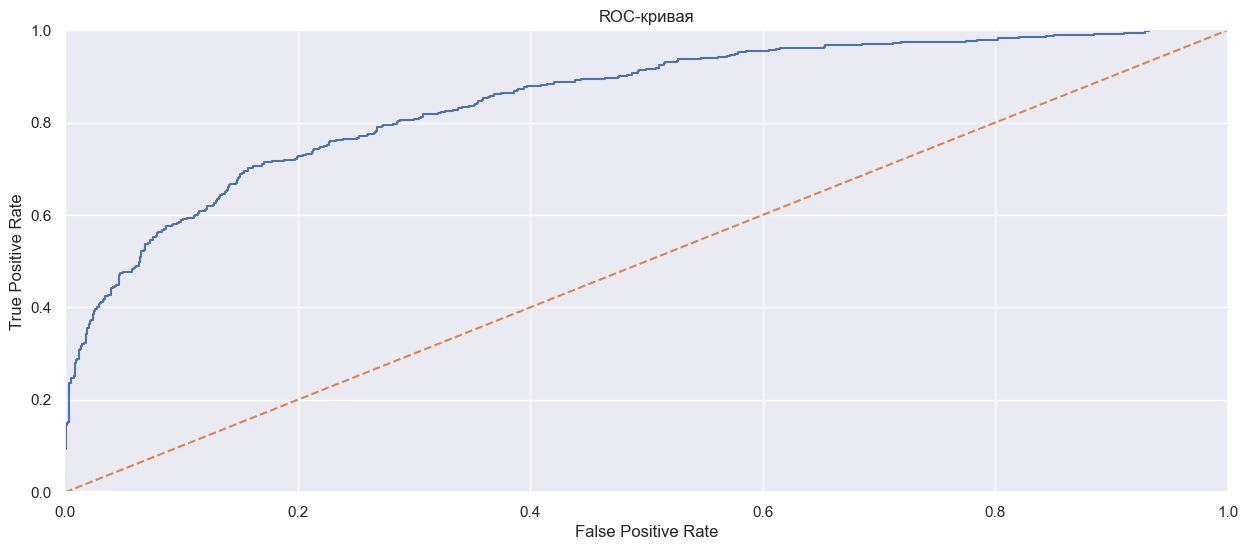

In [34]:
# постоим ROC-кривую для тестового образца
fpr, tpr, tresholds = roc_curve(target_test_clients, test_probabilities[:, 1])
plt.figure()
plt.plot(fpr, tpr)
# абсолютно случайная модель
plt.plot([0, 1], [0, 1], linestyle='--')
# размеры графика
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
# названия осей и графика
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая');

In [35]:
# Доля правильно идентифицированных меток 
print(recall_score(target_test_clients, test_predicted))

0.7070707070707071


Привильно идентифицированы 70,7% всех уходящих клиентов. Возможно можно и больше поймать, если изменить порог положительного класса.

## Общий вывод

С вероятностью в 70.7% нашу задачу найти потенциально уходящих людей из банка нам поможет модель случайного леса с уменьшенной выборкой. Её гиперпараметры: Глубина дерева: 10, Количество деревьев: 90, критерий: энтропия. Модель значительно лучше случайной - площадь под ROC - кривой более чем на 0.3 больше.